**HEART DISEASE ANALYSIS - BUSINESS INTELLIGENCE PROJECT - INEURON**



In [2]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is 90C4-2A5E

 Directory of E:\6.Project's\Internship Project's\Heart-disease-diagnostic-analysis-Ineuron.ai-main

25-08-2022  12:47    <DIR>          .
25-08-2022  12:47    <DIR>          ..
24-08-2022  12:24    <DIR>          .ipynb_checkpoints
04-01-2022  18:20            55,295 heart_disease_dataset.xlsx
25-08-2022  12:47           844,983 Heart_disease_diagnostic.ipynb
               2 File(s)        900,278 bytes
               3 Dir(s)  347,700,477,952 bytes free


In [4]:
#Extracting Dataset From System using Pandas Library

data = pd.read_excel('heart_disease_dataset.xlsx')
data.shape

(303, 19)

In [5]:
#Checking the names of the column

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'heart_disease',
       'sex_name', 'age_group', 'cp_type', 'thal_type'],
      dtype='object')

**There are 13 features in Dataset**

**age:** The person's age in years

**sex:** The person's sex (1 = male, 0 = female)

**cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)

**chol:** The person's cholesterol measurement in mg/dl

**fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach:** The person's maximum heart rate achieved

**exang:** Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest

**slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca:** The number of major vessels (0-3)

**thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**num:** Heart disease (0 = no, 1 = yes)


In [6]:
#Null values checking

data.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
num              0
heart_disease    0
sex_name         0
age_group        0
cp_type          0
thal_type        0
dtype: int64

Dataset don't have any null value present. So we are good to go for further stage.

In [7]:
data.groupby('num').size()

num
0.0    164
1.0    139
dtype: int64

In [8]:
#Converting Numerical data into Categorical data

def heart_disease(row):
  if row == 0:
    return 'Absent'
  if row == 1:
    return 'Present'

In [9]:
#Attaching the categorical data 'heart_disease' to the dataset

data['heart_disease'] = data['num'].apply(heart_disease)
data.shape
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease,sex_name,age_group,cp_type,thal_type
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,Absent,MALE,Elder,typical angina,fixed defect
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0,Present,MALE,Elder,asymptomatic,normal
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,Present,MALE,Elder,asymptomatic,revrsable defect
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,Absent,MALE,Mid Age,non-anginal pain,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,Absent,FEMALE,Mid Age,atypical angina,normal
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0,Absent,MALE,Elder,atypical angina,normal
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1.0,Present,FEMALE,Elder,asymptomatic,normal
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0,Absent,FEMALE,Elder,asymptomatic,normal
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1.0,Present,MALE,Elder,asymptomatic,revrsable defect
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0,Present,MALE,Mid Age,asymptomatic,revrsable defect


In [10]:
xy = data.groupby('heart_disease')['num'].count()
xy

heart_disease
Absent     164
Present    139
Name: num, dtype: int64

**EXPLORATORY DATA ANALYSIS USING VARIOUS CHARTS AND GRAPHS**

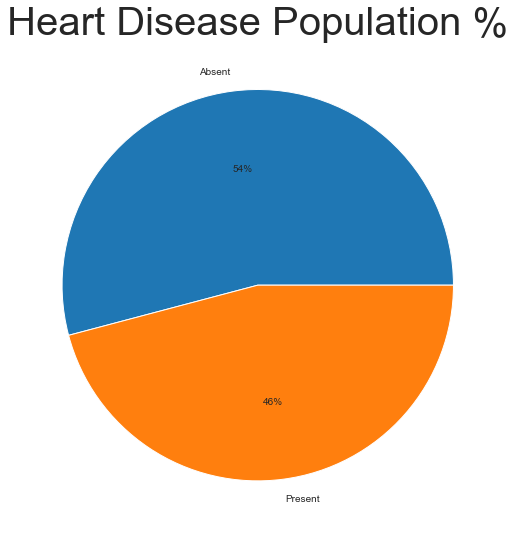

In [11]:
#Pie chart representing the percentage count of heart_disease

plt.figure(figsize=(10,9))
plt.pie(xy, labels=['Absent','Present'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=40)
plt.show()

***From the above graph people having heart disease (46%) < people not having heart disease (56%).***

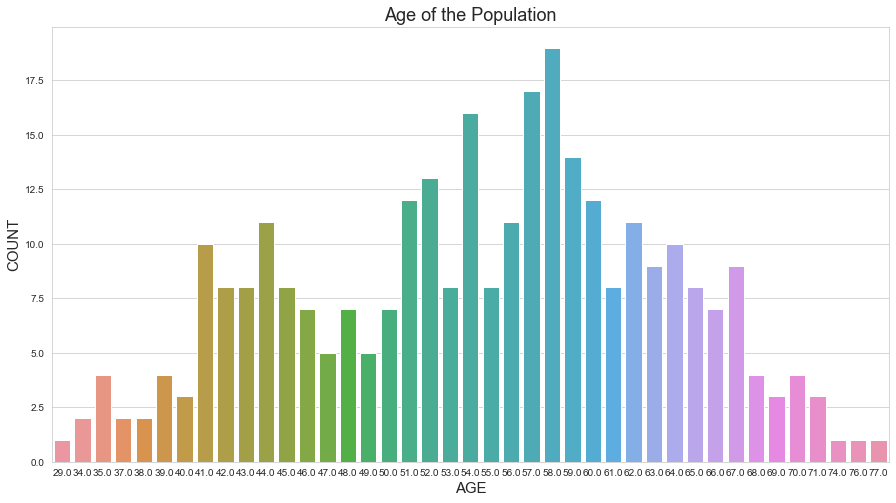

In [12]:
#Histogram countplot

plt.figure(figsize=(15,8))
sns.countplot(x ='age', data = data)
plt.title('Age of the Population', fontsize = 18)
plt.xlabel('AGE',fontsize = 15)
plt.ylabel('COUNT', fontsize = 15)
plt.show()

***Further grouping the population based on Age into***


*   Elderly
*   Middle-age
*   Young





In [13]:
Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29.0
Maximum Age = 77.0
Mean Age = 54.43894389438944


In [14]:
#Categorical Analysis

Young_Age = data[(data['age']>=29) & (data['age']<40)]
Middle_Age = data[(data['age']>=40) & (data['age']<55)]
Elderly_Age = data[(data['age']>55)]
print('Young Ages =',len(Young_Age))
print('Middle Ages =',len(Middle_Age))
print('Elderly Ages =',len(Elderly_Age))

Young Ages = 15
Middle Ages = 128
Elderly Ages = 152


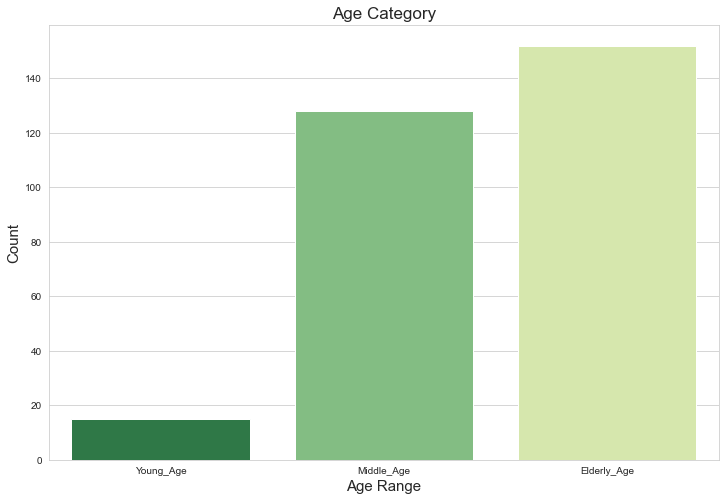

In [15]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn
plt.figure(figsize=(12,8))
sns.barplot(x=['Young_Age','Middle_Age','Elderly_Age'], y=[len(Young_Age), len(Middle_Age), len(Elderly_Age)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [16]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row == 1:
        return 'Male'
    elif row == 0:
        return 'Female'

In [17]:
data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease,sex_name,age_group,cp_type,thal_type,sex1
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,Absent,MALE,Elder,typical angina,fixed defect,Male
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0,Present,MALE,Elder,asymptomatic,normal,Male
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,Present,MALE,Elder,asymptomatic,revrsable defect,Male
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,Absent,MALE,Mid Age,non-anginal pain,normal,Male
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,Absent,FEMALE,Mid Age,atypical angina,normal,Female


In [18]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [19]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,heart_disease,sex_name,age_group,cp_type,thal_type,sex1,Age_Range
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,...,0.0,6.0,0.0,Absent,MALE,Elder,typical angina,fixed defect,Male,Elder Age
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,...,3.0,3.0,1.0,Present,MALE,Elder,asymptomatic,normal,Male,Elder Age
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,...,2.0,7.0,1.0,Present,MALE,Elder,asymptomatic,revrsable defect,Male,Elder Age
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,...,0.0,3.0,0.0,Absent,MALE,Mid Age,non-anginal pain,normal,Male,Young Age
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,...,0.0,3.0,0.0,Absent,FEMALE,Mid Age,atypical angina,normal,Female,Middle Age


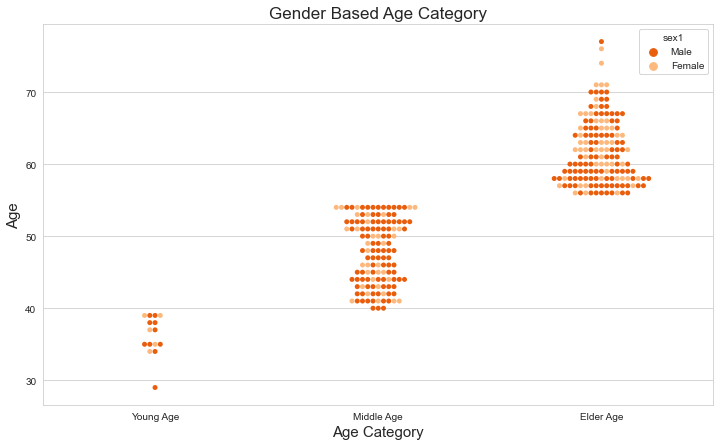

In [20]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(12,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=data, order=['Young Age','Middle Age','Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

***Interesting observation is that ▶***

***Number of Male population is more in 'Middle Age' Category***

***Number of Female population is more in 'Elder Age' Category*** 

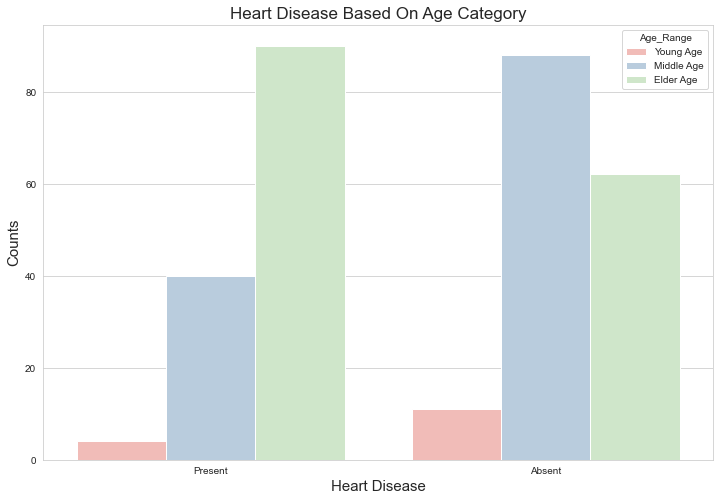

In [21]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='heart_disease', hue='Age_Range', data=data, order=['Present','Absent'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()



*  *** Elderly Age population is suffering from heart_disease while,***
*   ***Most of the Young and Middle Age population are free from heart_disease.***



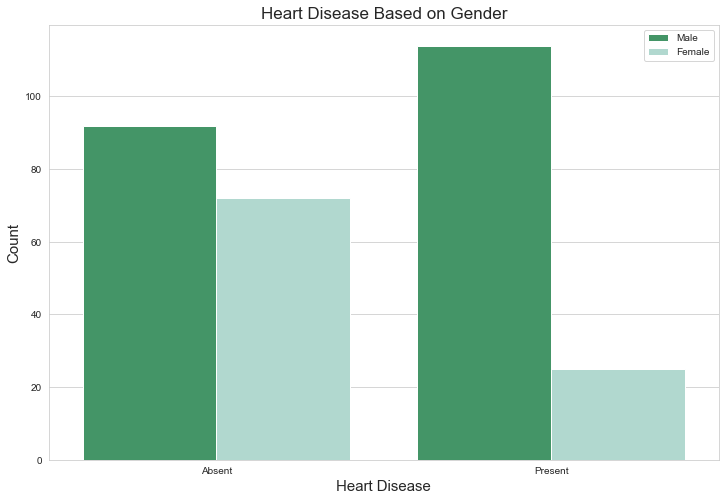

In [22]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.countplot(x=data['heart_disease'], hue='sex1', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

***MALE population is more prone to heart disease than female.☹***

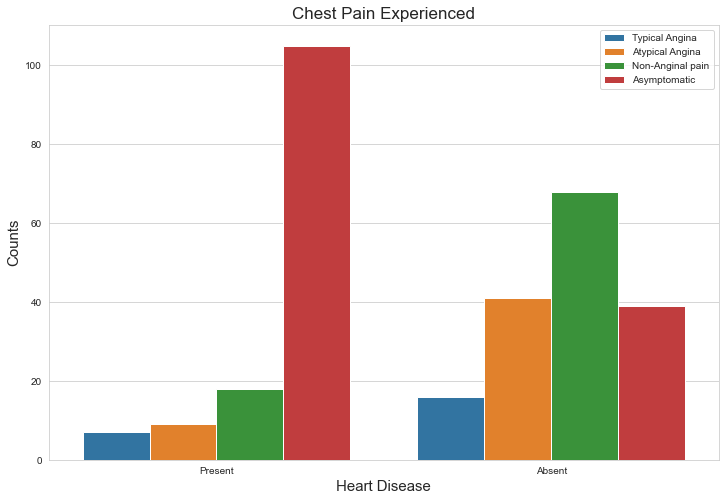

In [23]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.countplot(x=data['heart_disease'], hue='cp', data=data, order=['Present','Absent'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

***It seems that people with asymptomatic chest pain are more prone to heart disease.***



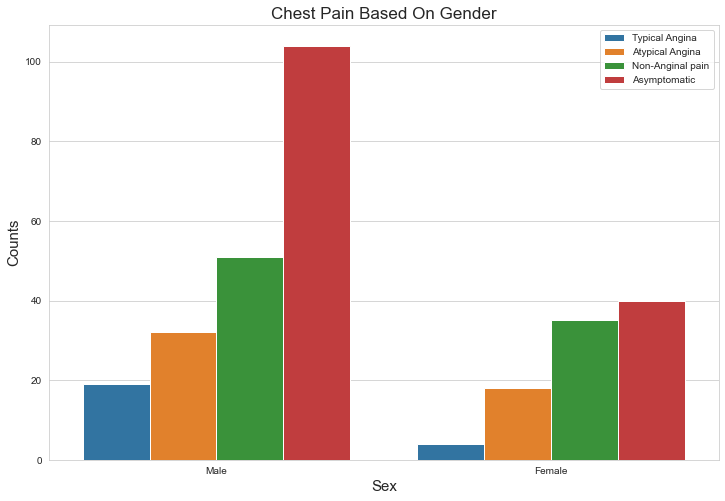

In [24]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.countplot(x=data['sex1'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

***Asymptomatic chestpain is more in male population than female.***



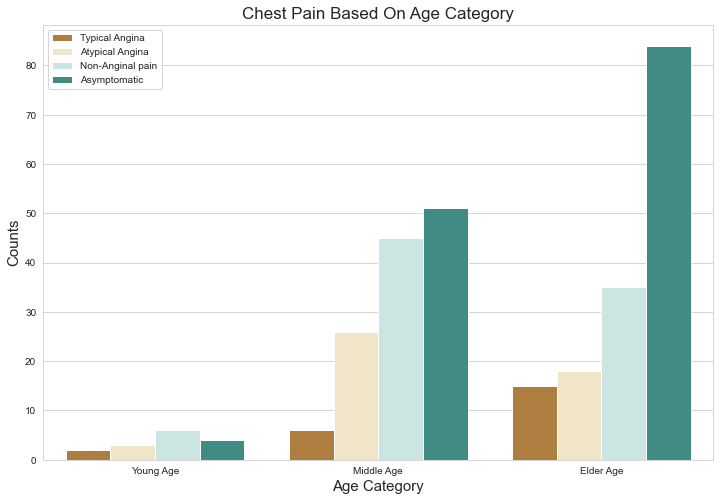

In [25]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

***Asymptomatic pain is more present in Elder Age and Middle Age category***

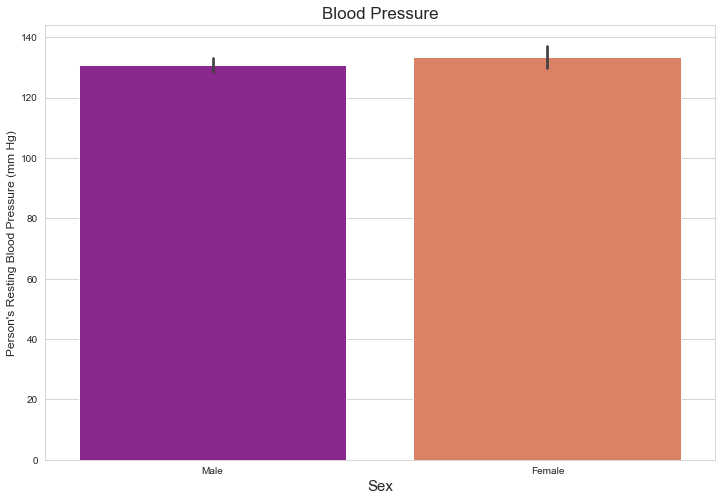

In [26]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

***Blood Pressure rate is equal in both Male and Female***

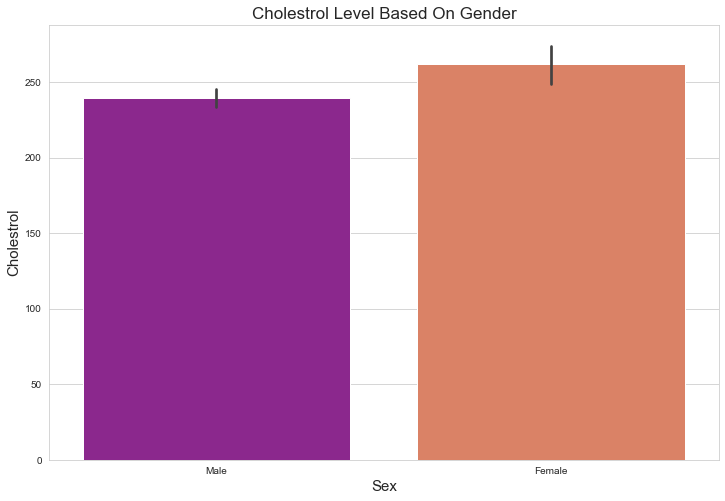

In [27]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='sex1', y='chol', data=data, palette='plasma')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

***Cholestrol level is more in Female population ***

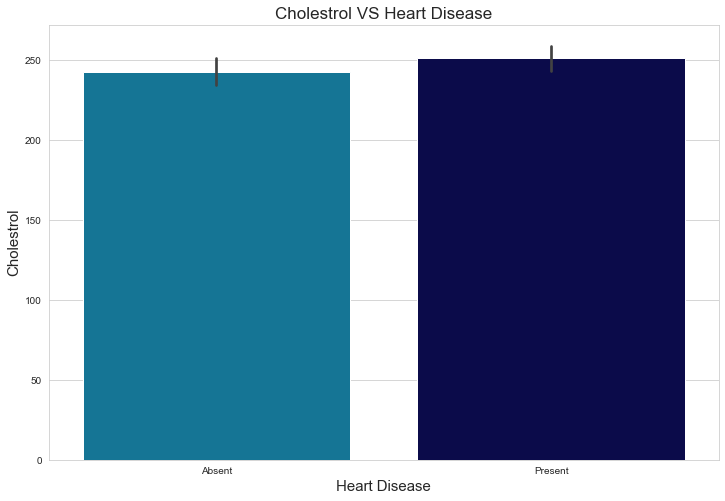

In [28]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='heart_disease', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

***Although we cannot exactly differentiate whether cholestrol rate is highly proportinal to heart disease, it is hihgly correleted to more risk of getting disease.***

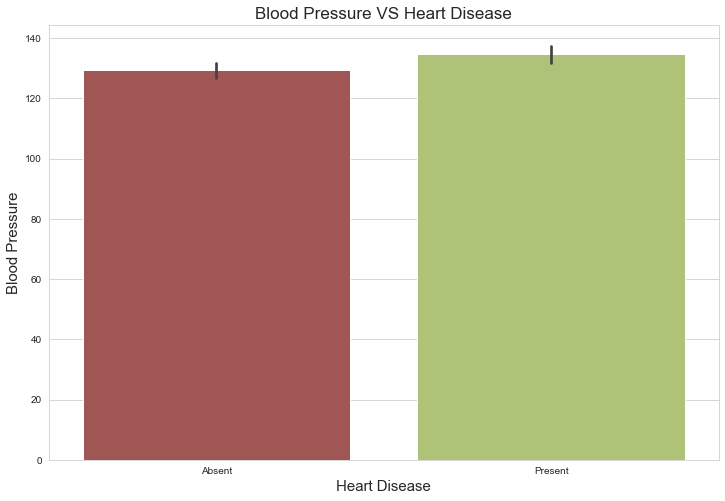

In [29]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='heart_disease', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

***High BP involves more risk of getting heart disease.***

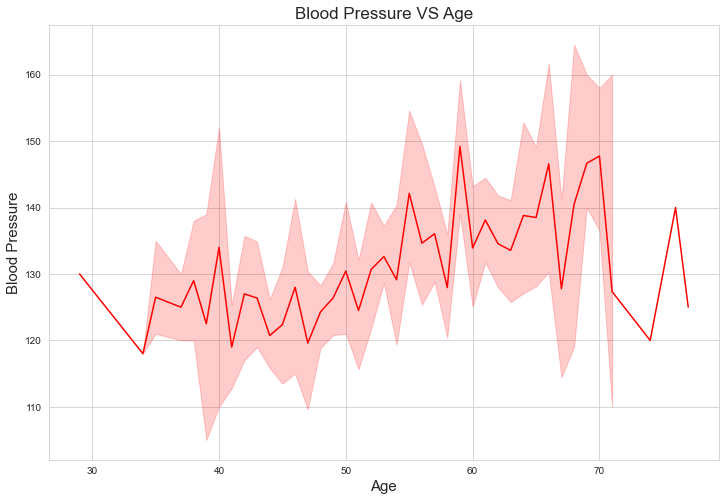

In [30]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

***We can see that BP increases from age 50 to 60 and the pattern will somehow tend to continue till 70.***

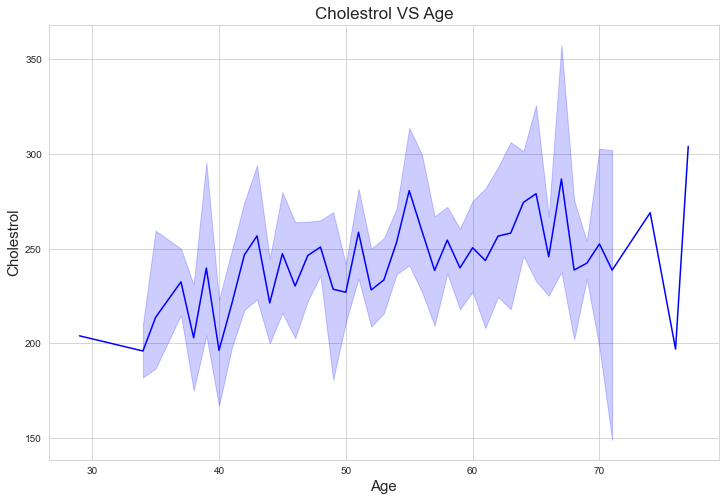

In [31]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

***Cholestrol gradually incresing in the age group of 50 - 60.***

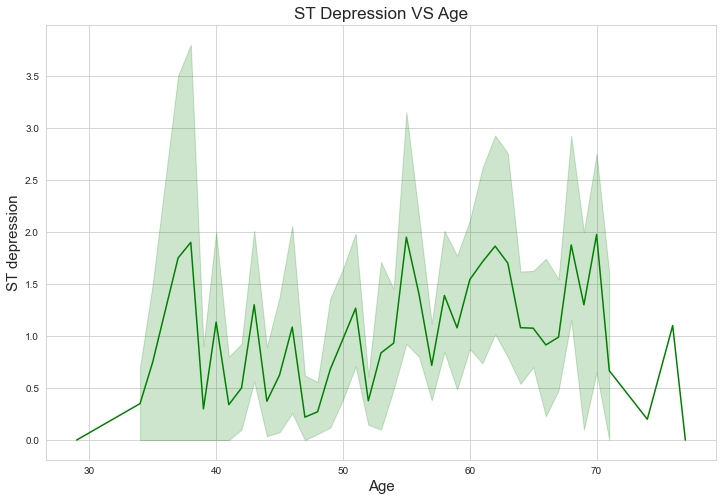

In [32]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.lineplot(x='age', y='oldpeak', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

***ST depression almost increasing in the age group of 30 to 40.***

ST depression refers to a finding on an electrocardiogram, wherein the 
trace in the ST segment is abnormally low below the baseline



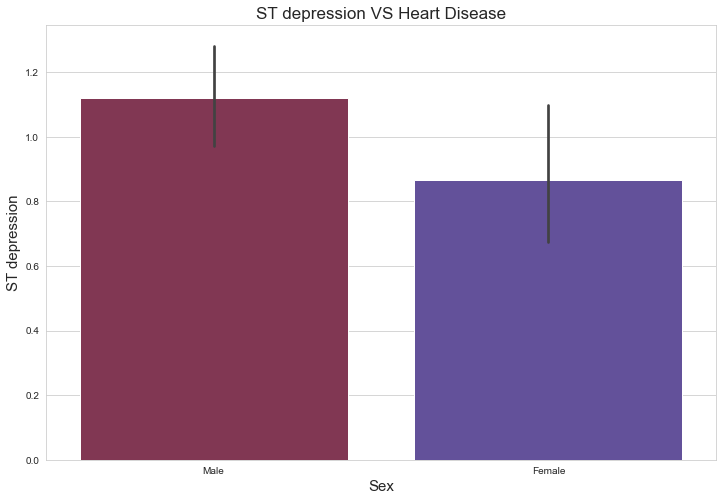

In [33]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

***More Males are prone to ST depression than Female.***

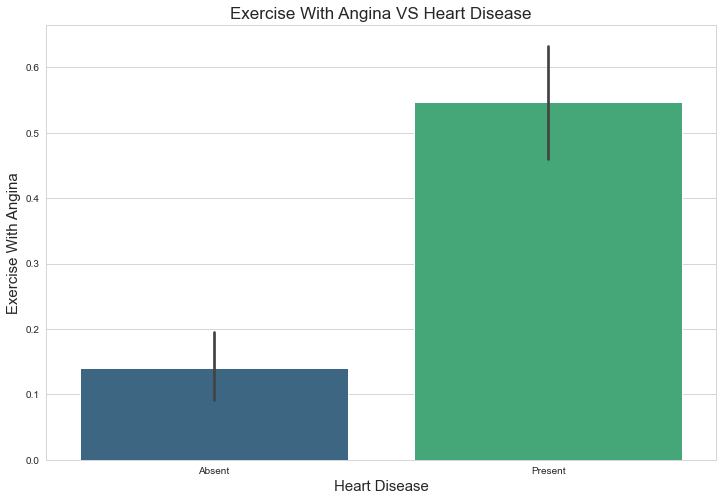

In [34]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='heart_disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

*** If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.***

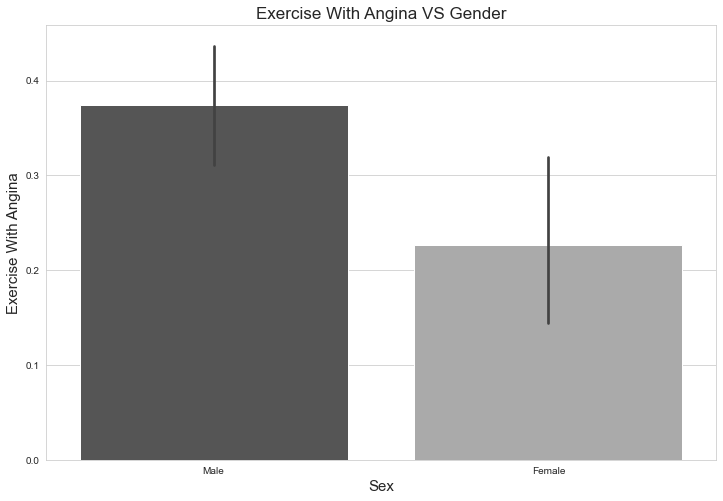

In [35]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

**Males have high excersice Anigna**

***Anigna is a condition where chest pain occcurs due to low/insufficient blood flow to heart.***

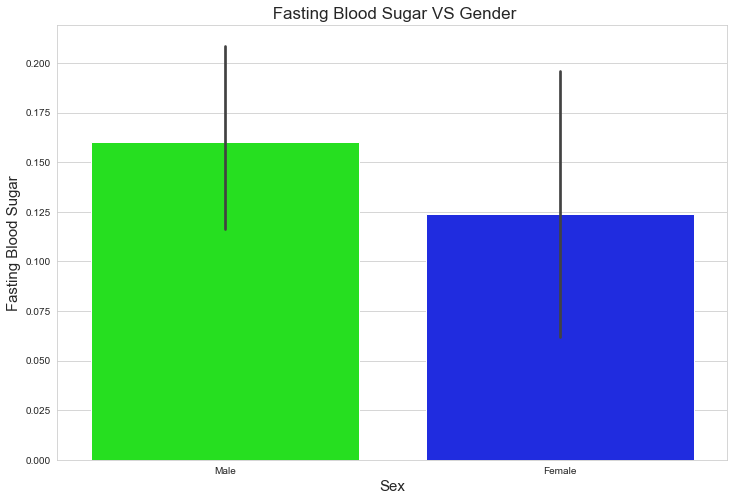

In [36]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

***Males have high number of fasting Blood Sugar more than 120.***

<AxesSubplot:>

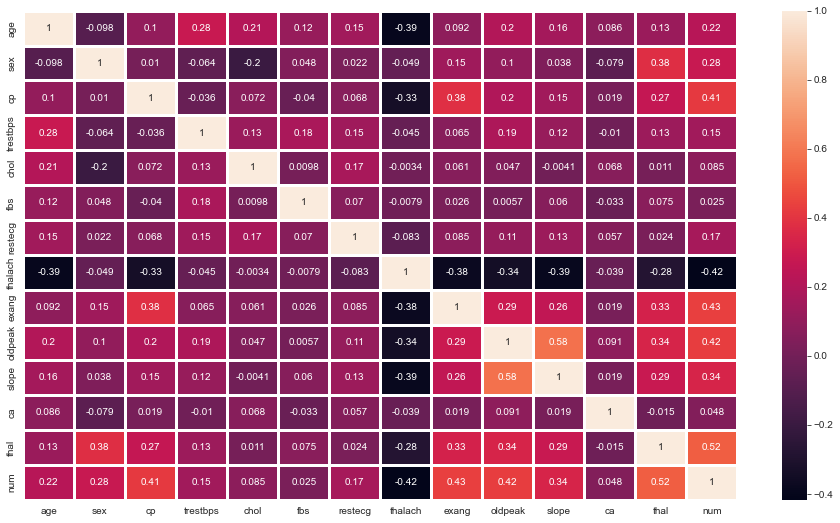

In [37]:
#Heatmap Creation using Seaborn

plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)